In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("DataSets/iris.csv",index_col=0)
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
13,4.8,3.0,1.4,0.1,Iris-setosa
112,6.4,2.7,5.3,1.9,Iris-virginica
15,5.8,4.0,1.2,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
26,5.0,3.0,1.6,0.2,Iris-setosa


# Outliers

<AxesSubplot:xlabel='PetalWidthCm'>

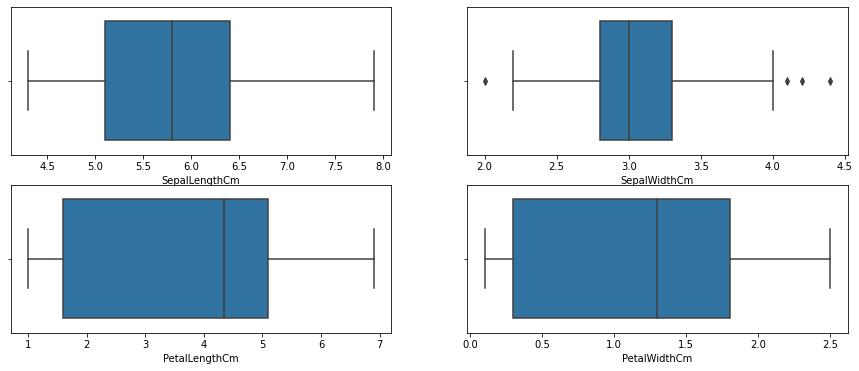

In [3]:
plt.figure(figsize=(15,6))

plt.subplot(2,2,1)
sns.boxplot(x='SepalLengthCm' ,data=df)

plt.subplot(2,2,2)
sns.boxplot(x='SepalWidthCm', data=df)

plt.subplot(2,2,3)
sns.boxplot(x='PetalLengthCm', data=df)

plt.subplot(2,2,4)
sns.boxplot(x='PetalWidthCm', data=df)

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Species'>

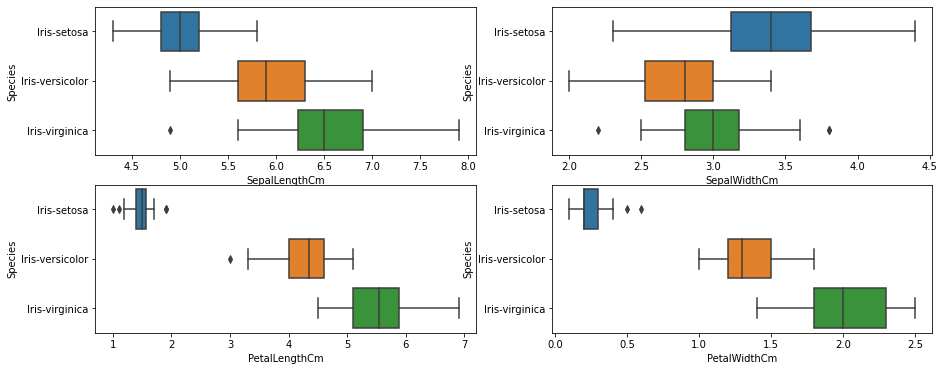

In [4]:
plt.figure(figsize=(15,6))

plt.subplot(2,2,1)
sns.boxplot(x='SepalLengthCm', y="Species", data=df)

plt.subplot(2,2,2)
sns.boxplot(x='SepalWidthCm', y="Species", data=df)

plt.subplot(2,2,3)
sns.boxplot(x='PetalLengthCm', y="Species", data=df)

plt.subplot(2,2,4)
sns.boxplot(x='PetalWidthCm', y="Species", data=df)

# Splitting Data

In [5]:
X = df.iloc[:,:-1]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [6]:
Y = df.iloc[:,-1]
Y

Id
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
            ...      
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
150    Iris-virginica
Name: Species, Length: 150, dtype: object

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

# Encoding on Target variable

In [8]:
# Applying Label Encoding on Ys
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
LE.fit(Y_train)
Y_train = LE.transform(Y_train)
Y_test = LE.transform(Y_test)

In [9]:
print(Y_train,Y_test)

[1 2 1 2 2 0 1 0 1 2 2 0 2 2 1 2 0 0 0 1 0 0 2 2 2 2 2 1 2 1 0 2 2 0 0 2 0
 2 2 1 1 2 2 0 1 1 2 1 2 1 0 0 0 2 0 1 2 2 0 0 1 0 2 1 2 2 1 2 2 1 0 1 0 1
 1 0 1 0 0 2 2 2 0 0 1 0 2 0 2 2 0 2 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 2 0 0
 2 1 2 1 2 2 1 2 0] [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2]


# Basic Modelling Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

from sklearn.metrics import classification_report,accuracy_score
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



# Probabilities of [ setosa , versicolor , virginica ]

In [11]:
Y_pred_prob = model.predict_proba(X_test)
Y_pred_prob

array([[9.84838232e-01, 1.51617462e-02, 2.15224989e-08],
       [2.77749519e-01, 7.19608337e-01, 2.64214349e-03],
       [6.20475512e-03, 8.89277854e-01, 1.04517391e-01],
       [9.85603757e-01, 1.43961808e-02, 6.26474092e-08],
       [1.13488651e-06, 1.90732470e-02, 9.80925618e-01],
       [4.44442155e-03, 6.28359278e-01, 3.67196300e-01],
       [1.43055465e-04, 1.27857276e-01, 8.71999668e-01],
       [9.58064866e-01, 4.19339194e-02, 1.21506487e-06],
       [9.70124087e-01, 2.98756104e-02, 3.02875690e-07],
       [9.45644993e-06, 2.71060593e-02, 9.72884484e-01],
       [1.89251958e-02, 8.79798873e-01, 1.01275931e-01],
       [9.66646254e-01, 3.33533073e-02, 4.38307441e-07],
       [4.58637807e-06, 3.10290430e-02, 9.68966371e-01],
       [7.03645876e-03, 8.02106947e-01, 1.90856595e-01],
       [6.90493968e-03, 7.49330214e-01, 2.43764846e-01],
       [9.88354091e-01, 1.16458438e-02, 6.55783319e-08],
       [2.24984909e-02, 9.36973242e-01, 4.05282675e-02],
       [1.08465678e-02, 6.82262

In [12]:

params = [ ['lbfgs','l2'],['lbfgs','none'],
           ['liblinear','l1'],['liblinear','l2'],
           ['newton-cg','l2'],['newton-cg','none'],
           ['sag','l2'],['sag','none'],
           ['saga','l1'],['saga','l2'],['saga','none']  ]

#  ['saga','elasticnet']  --->  Need to perform Scalling on the Data 

all_combinations = []

for i in params:

    from sklearn.linear_model import LogisticRegression

    model = LogisticRegression(solver=i[0] , penalty=i[1])

    model.fit(X_train,Y_train)

    Y_pred = model.predict(X_test)
    
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(Y_test,Y_pred)
    
    print(f"{i} ---> {acc} ")
    
    all_combinations.append([i[0],i[1],acc])

['lbfgs', 'l2'] ---> 0.9666666666666667 
['lbfgs', 'none'] ---> 1.0 
['liblinear', 'l1'] ---> 0.9333333333333333 
['liblinear', 'l2'] ---> 0.8333333333333334 
['newton-cg', 'l2'] ---> 0.9666666666666667 
['newton-cg', 'none'] ---> 1.0 
['sag', 'l2'] ---> 0.9666666666666667 
['sag', 'none'] ---> 0.9666666666666667 
['saga', 'l1'] ---> 0.9666666666666667 
['saga', 'l2'] ---> 0.9666666666666667 
['saga', 'none'] ---> 0.9666666666666667 


In [13]:
def Get_Best_combintion(Values_List):
    max_val = 0
    max_index = 0
    for i in Values_List:
        if max_val < i[2]:
            max_val = i[2]
            max_index = Values_List.index(i)
    return Values_List[max_index]

In [14]:
Get_Best_combintion(all_combinations)

['lbfgs', 'none', 1.0]